# HOMEWORK 2 - TRANSFER FUNCTIONS AND SYSTEM IDENTIFICATION

This homework is about transfer functions and system identification.
There are two problems.

Make a copy of this notebook, and answer the questions.

# Preliminaries

In [1]:
import controlSBML as ctl
import numpy as np
import pandas as pd
import control
import numpy as np
import matplotlib.pyplot as plt
import sympy
import tellurium as te
import sympy

# Helpers

In [2]:
class PlotResult(object):

    def __init__(self, times=None, yt=None, ax=None):
        self.times = times
        self.yt = yt
        self.ax = ax
        
    def __repr__(self):
        return ""

In [3]:
def plotTF(tf, times=None, is_plot=True, figsize=(5,5)):
    if times is None:
        times = np.linspace(0, 10, 100)
    _, yt = control.forced_response(tf, T=times, U=1)
    if is_plot:
        _, ax = plt.subplots(1, figsize=figsize)
        ax.plot(times, yt)
        ax.set_xlabel("time")
    else:
        ax = None
    return PlotResult(times=times, yt=yt, ax=ax)

# Tests
tf = control.TransferFunction([1], [1, 0])
plot_result = plotTF(tf, is_plot=False)
assert(isinstance(plot_result, PlotResult))
print("OK!")

OK!


# Problem 1: Constructing Laplace Transforms for reaction networks

In this problem, you will construct a Laplace transform
for the same branching network we discussed in class, but with
a different input and output.
Below is the reaction network:

\begin{eqnarray}
s_1 & \xrightarrow{k_1 s_1} s_2 \\
s_2 & \xrightarrow{k_2 s_2} s_1 \\
s_1 & \xrightarrow{k_3 s_1} s_3 \\
u & \xrightarrow{k_1 u} s_2 \\
\end{eqnarray}

The input to the system is $u$; the output is $s_2$. (In class, the output
was $s_3$.)

## 1. (5 pts) System equations

\begin{eqnarray}
\dot{s}_1 & = & k_2 s_2 - k_1 s_1 - k_3 s_1  \\
\dot{s}_2 & = & -k_2 s_2 + k_1 s_1 + k_1 u \\
\dot{s}_3 & = & k_3 s_1  \\
\end{eqnarray}

## 2. (5 pts) LT of system equations

\begin{eqnarray}
s S_1(s) & = & k_2 S_2(s) - k_1 S_1 (s) - k_3 S_1 (s)  \\
s S_2 (s) & = & -k_2 S_2 (s) + k_1 S_1 (s) + k_1 U(s) \\
s S_3(s) & = & k_3 S_1 (s) \\
\end{eqnarray}


## 3. (25 pts) Calculate transfer function (**20 pts**)

We want $G(s) = \frac{S_2 (s)}{U(s)}$.
We can transform the second system equation so that we have $S_1 (s)$
in terms of $S_2 (s)$. That is,
\begin{eqnarray}
s S_1 (s) & = & k_2 S_2 (s) - k_1 S_1 (s) - k_3S_1 (s)  \\
S_1 (s)(s + k_1 + k_3)& = &k_2 S_2 (s) \\
S_1 (s)& = &\frac{k_2 }{s + k_1 + k_3}S_2 (s)
\end{eqnarray}
We can then substitute this equation into the equation for $S_2 (s)$  and solve for $S_2 (s)$  in terms of $U(s)$.
\begin{eqnarray}
s S_2 (s) & = & -k_2 S_2 (s) + k_1 S_1 (s) + k_1 U(s)  \\
s S_2 (s) & = & -k_2 S_2 (s) + \frac{k_2 k_1 }{s + k_1 + k_3}S_2 (s) + k_1 U(s) \\
0 &=& -s S_2 (s) -k_2 S_2 (s) + \frac{k_2 k_1 }{s + k_1 + k_3}S_2 (s) + k_1 U(s)\\
\end{eqnarray}

In [4]:
s3, s1, s, k1, k2, k3, s2, u = sympy.symbols("s3, s1, s, k1, k2, k3, s2, u")

In [5]:
expr=-s*s2-k2*s2+((k1*k2)/(s+k1+k3))*s2+k1*u
expr

k1*k2*s2/(k1 + k3 + s) + k1*u - k2*s2 - s*s2

In [6]:
sympy.solve(expr, s2)

[k1*u*(k1 + k3 + s)/(k1*s + k2*k3 + k2*s + k3*s + s**2)]

In [7]:
s2=sympy.solve(expr,s2)[0]
s2

k1*u*(k1 + k3 + s)/(k1*s + k2*k3 + k2*s + k3*s + s**2)

$G(s) = \frac{S_2(s)}{U(s)} = \frac{k_1^2 + k_1 k_3 + k_1 s}{s^2 + (k_1+k_2+k_3) s+k_1 k_2+k_2 k_3 -k_2}$

**Comment**
1. You should get the follow. It seems that you have a small mistake in the denominator. I changed the values of k1, k2, k3 in the next 2 sections, and you see the discrepancies.
$\frac{S_2(s)}{U(s)} = 
\frac{ k_{1} \left(k_{1} + k_{3} + s\right)}{k_{1} s + k_{2} k_{3} + k_{2} s + k_{3} s + s^{2}}$

## 4. (5 pts) Predict step response

Use the ``control`` package to construct the transfer function that you derived in Step 3, and simulate the transfer function. Plot the result.

0.8333333333333333

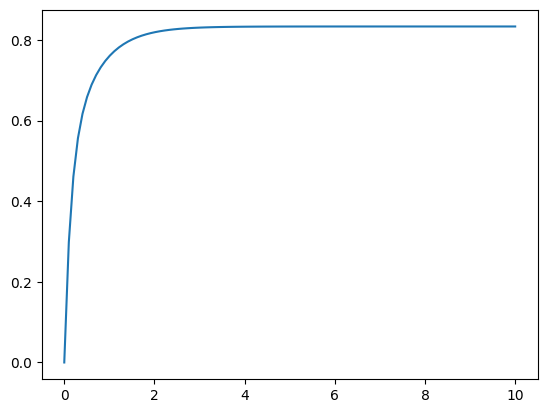

In [22]:
# Initialize constants
k1, k2, k3 = (1, 1, 1)
k1, k2, k3 = (4, 2, 3)
times = np.linspace(0, 10, 100)
# Response to input
tf = control.TransferFunction([k1, k1^2+k1*k3],
                              [1, k1+k2+k3, k1*k2+k2*k3-k2])
_, yt = control.forced_response(tf, T=times, U=1)
# Plot the results
plt.plot(times, yt)
control.TransferFunction.dcgain(tf)

## 5. (5 pts) Simulate in Antimony

Write an Antimony model for the original system and simulate it for a step respoinse.

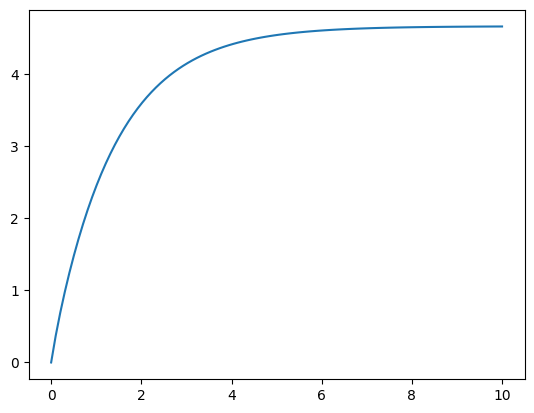

In [23]:
model = """
s1 -> s2; k1*s1
s2 -> s1; k2*s2
s1 -> s3; k3*s1
$u -> s2; k1*u

k1 = 1
k2 = 1
k3 = 1
s1 = 0
s2 = 0
s3 = 0
k1 = 4
k2 = 2
k3 = 3
$u = 1
"""
rr = te.loada(model)
data = rr.simulate(0, 10, 100)
plt.plot(data["time"], data["[s2]"])

In [10]:
control.TransferFunction.dcgain(tf)

2.0

## 6. (5 pts) Analysis

1. How does the transfer function you derived and simulated in step 3 compare with the simulation results for the Antimony model in step 4?

The simulation of the transfer function performs very similar to the Antimony model derived in step 4. The have the same shape and both approach the limit at 2  

2. How does DC gain change as $k_1$ increases?

The DC gain initially increases $k_1$ from 1 to 2, then DC gain starts to decay twoards 0.

3. Explain why the DC gain of this system is finite whereas the DC gain of the system with $s_3$ as output does not have finite DC gain.

$s_3$ is the finally output of the system of eqautions (it has not reverse equation) so a constant step increase of u would just continually increase s3 and it would never hit an equilibrium. Since S2 has a concentration dependent reverse reaction to create s1, and increase in U would increase the rate of that production, allowing the system to eventually hit an equilibrium and have a defined DC gain. 

# Problem 2: System Identification

You will do system identification for the system you chose in the first homework.

## 1. (20 pts) Determine the operating region for you system.

In [11]:
def plotStaircaseResponse(builder, is_plot=True, **kwargs):
    """
    This function circumvents a bug in SISOTransferFunctionBuilder.plotStairCaseResponse.
    It has the same arguments and return value as the original function.
    """
    plot_result = builder.plotStaircaseResponse(is_plot=False, **kwargs)
    # Plot if requested
    if is_plot:
        times = np.array(plot_result.time_series.index)/1000
        df = pd.DataFrame(plot_result.time_series)
        df.index = times
        if "figsize" in kwargs.keys():
            figsize = kwargs["figsize"]
        else:
            figsize = (10, 10)
        legends = list(df.columns)
        fig, ax = plt.subplots(1, figsize=figsize)
        staircase_column = [c for c in df.columns if "staircase" in c][0]
        staircase_values = df[staircase_column].values
        del df[staircase_column]
        ax.plot(df)
        ax2 = ax.twinx()
        # Plot the staircase
        ax2.plot(times, staircase_values, color="red",
              linestyle="--")
        ax2.set_ylabel(staircase_column, color="red")
        ax.legend(df.columns)
    #
    return plot_result

# TESTS
if False:
    plot_response = plotStaircaseResponse(linear_builder, initial_value=2, final_value=10, num_step=5, figsize=(3,3),
                                        legend_crd=(0.5, 1), end_time=100, is_plot=True)
    assert(isinstance(plot_response.time_series, ctl.Timeseries))
    print("OK!")

Use ``SISOTransferFunctionBuilder`` to plot a staircase of the control input to your system and the measured output.
Explain why you chose the operating region you did (i.e., the value ranges of
the control input).

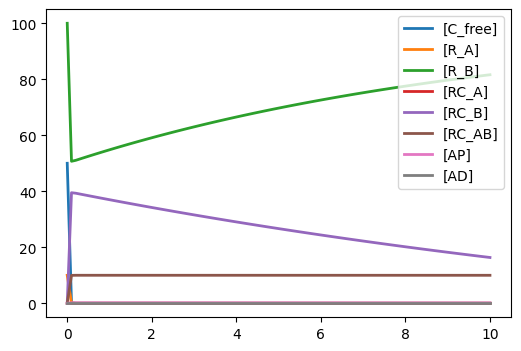

In [12]:
bsAb_CTLSB = ctl.ControlSBML("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000788.2?filename=Schropp2019.xml", 
                        input_names=["C_free"], output_names=["RC_B"])
bsAb_RR = bsAb_CTLSB.roadrunner
bsAb_RR.simulate(0, 10, 100)
bsAb_RR.plot()

In [13]:
bsAb_builder = bsAb_CTLSB.makeSISOTransferFunctionBuilder()
bsAb_builder.input_name, bsAb_builder.output_name

('C_free', 'RC_B')

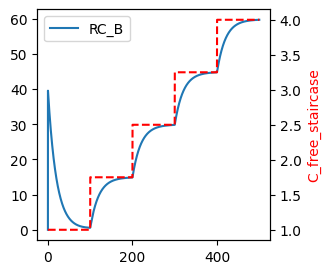

In [14]:
plotStaircaseResponse(bsAb_builder, initial_value=1, final_value=4, figsize=(3,3),
                                    num_step=5, legend_crd=(0.5, 1), end_time=500)

I chose an imput control region between 1 and 4 units of C_free. I chose this operating range because my setpoint is 40 and these input range produces RC_B from 0 to 60 which alows for control both above and below my setpoint. 

## 2. (20 pts) Find a tranfser function for your system for the operating region.

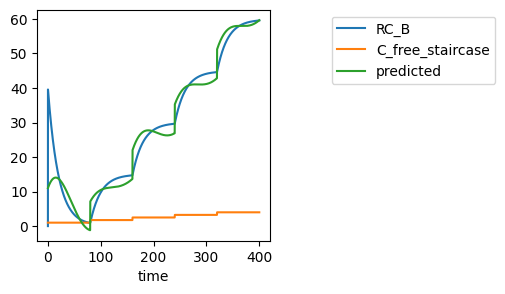

In [15]:
fitter_result = bsAb_builder.fitTransferFunction(4,4, 
                                                   final_value=4,
                                                   initial_value=1, start_time=0, end_time=400)
ctl.plotOneTS(fitter_result.time_series, figsize=(3,3), legend_crd=(2,1))

In [16]:
fitter_result.transfer_function

TransferFunction(array([ 9.99759070e+00,  6.86286091e-01, -3.20420022e-03,  2.03648005e-04]), array([9.07790663e-01, 2.63707853e-02, 1.45175495e-03, 8.37311367e-06]))

Use ``SISOTransferFunctionBuilder`` to fit a transfer function for your system.
Justify that the transfer function fits sufficiently well and does not overfit.

Since this model is not a linear model, a more complex transfer function is needed. Functions with less than 4 terms were unable to match the curviture trend of the model. The 4 term transfer function was the smallest degree transfer function that was able to roughly estimate the behavior of the model. 

## 3. (10 pts)  Analyze the transfer function.

What is the DC gain? What are the poles? What are the implications for control?

In [17]:
fitter_result.transfer_function.dcgain()

24.321657741178846

The DC gain is 24.3. This mkaes sense given this system since a small increase in C_free results in a decently large concentration increase of RC_B. 

In [18]:
fitter_result.transfer_function.poles()

array([-0.01135567+0.03641868j, -0.01135567-0.03641868j,
       -0.00633807+0.j        ])

All of the poles are negative but two lie on the imaginary axis. These means this system in marginally stable. The smallest pole has a value of -0.006 which means the speed to convergance will be very slow which is what I saw when making the staircase response. 